# Problem Set 3
## Problem 1

### Loading the dataset

In [18]:
from sklearn.datasets import load_boston
import numpy as np
boston = load_boston()
x = boston.data
y = boston.target

### Splitting the dataset into testing, validation and training

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    train_size=400,
                                                    random_state=13)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


### Standardizing the dataset

In [20]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(x_train)
x_train_std = scaler.transform(x_train)

### Adding Column

In [21]:
X = np.concatenate([np.ones((x_train_std.shape[0], 1)), x_train_std], axis=1).astype(np.float)
X_test = np.concatenate([np.ones((x_test.shape[0], 1)), scaler.transform(x_test)], axis=1).astype(np.float)

### Least Square Model
$$
\theta_{optimal} = (X^{T}X)^{-1}X^{T}y
$$

#### Finding $\theta_{optimal}$

In [22]:
theta_opt = np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(X), X)), np.transpose(X)), 
                      y_train.astype(np.float))

#### Evaluating Least Square Model
The prediction of Least Square Model is given by $\hat{y} = X \theta_{optimal}$. 
The mean square error is given by:$\frac{1}{N}||y-\hat{y}||_{2}^{2}$

In [23]:
from sklearn.metrics import mean_squared_error
pred = np.matmul(X_test, theta_opt)
error = mean_squared_error(y_test, pred)
print ("MSE for Least Square Model = %.4f"%(error))

MSE for Least Square Model = 24.4836


### Ridge Regression

$$
\theta_{optimal} = (X^{T}X+\Gamma^{T}\Gamma)^{-1}X^{T}y
$$
where
$$
    \Gamma = 
    \begin{bmatrix}
        0&\mathbf{0^{T}}\\
        \textbf{0}&\sqrt{\lambda}\textbf{I}\\
    \end{bmatrix}
$$
and $\Gamma \in \mathbb{R}^{(d+1) \times (d+1)}$

#### Creating the $\Gamma$ Matrix

In [24]:
def Gamma(d, Lambda):
    """
        Function to generate Gamma
    """
    I = np.identity(d)
    O_00 = 0
    O_01 = np.zeros((1,d))
    O_10 = np.zeros((d,1))
    gamma = np.block([[O_00, O_01], 
                       [O_10, Lambda*I]]);
    return gamma

#### Finding $\theta_{optimal}$
Let $X_{inv} = (X^{T}X + \Gamma^{T}\Gamma)^{-1}$

In [25]:
def ridgeRegression(X,Y, Lambda):
    """
        Function to find optimal weights for ridge regression
    """
    d = X.shape[1]-1
    gamma = Gamma(d, np.sqrt(Lambda))
    X_inv = np.linalg.inv(np.matmul(np.transpose(X), X) + np.matmul(np.transpose(gamma), gamma))
    theta_opt = np.matmul(np.matmul(X_inv, np.transpose(X)), Y)
    return theta_opt

#### Evaluating Ridge Regression
The prediction of Ridge Regression is given by $\hat{y} = X \theta_{optimal}$. 
The mean square error is given by:$\frac{1}{N}||y-\hat{y}||_{2}^{2}$

In [26]:
def evaluateRegression(X,Y,theta):
    """
        Function to evaluate performance of ridge Regression using MSE
    """
    pred = np.matmul(X, theta)
    error = mean_squared_error(Y, pred)
    return error

#### Splitting between Training and Validation

In [27]:
X_train, X_val, Y_train, Y_val = train_test_split(X, 
                                                    y_train, 
                                                    test_size=0.25,
                                                    random_state=13)

#### Finding Optimal $\lambda$ (Training)

To find the optimal value of Lambda for Ridge Regression, we split the training set to get a holdout or validation set. About 25% of the training set is allocated towards validation set. 

To find the optimal $\lambda$, we begin with a relatively small value of $\lambda = 0$ and iteratively increase it. The performance is evaluated by mean square error (MSE). The value of $\lambda$ corresponding to lowest MSE is the optimal $\lambda$.

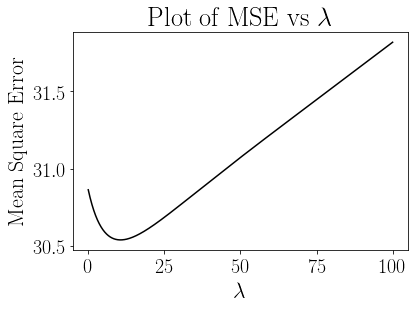

The optimal value of lambda is 10.7000
The value of MSE corresponding to minimum Lambda is 30.5397


In [28]:
# Iterating through lambda to find optimal value
errors = []
Lambdas = np.arange(0.1,100,0.1).tolist()
for Lambda in Lambdas:
    theta = ridgeRegression(X_train, Y_train, Lambda)
    error = evaluateRegression(X_val, Y_val, theta)
    errors.append(error)
# Setting Up Matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
#Setting Matplotlib to display correctly
rc('text', usetex=True)
rc('xtick', labelsize=20) 
rc('ytick', labelsize=20) 
font = {'family' : 'serif',
        'size'   : 22}
rc('font', **font)
# Plotting the error
plt.figure()
plt.plot(Lambdas, errors, 'k')
plt.xlabel(r'$\lambda$')
plt.ylabel(r'Mean Square Error')
plt.title(r"Plot of MSE vs $\lambda$")
plt.show()
# Finding the Optimal Lambda
Lambda_opt = Lambdas[errors.index(min(errors))]
print ("The optimal value of lambda is %.4f"%Lambda_opt)
print ("The value of MSE corresponding to minimum Lambda is %.4f"%min(errors))
# Finding Optimal Model
theta_opt = ridgeRegression(X_train, Y_train, Lambda_opt)

#### Evaluating Ridge Regression on Test Set

In [29]:
error = evaluateRegression(X_test, y_test, theta_opt)
print ("MSE for Ridge Regression Model = %.4f"%(error))

MSE for Ridge Regression Model = 23.9856


### LASSO

#### Splitting Between Training and Testing

In [30]:
X_train, X_val, Y_train, Y_val = train_test_split(x_train_std, 
                                                    y_train, 
                                                    test_size=0.25,
                                                    random_state=13)

#### Finding Optimal $\alpha$ (Training)

To find the optimal value of $\alpha$ for Ridge Regression, we split the training set to get a holdout or validation set. About 25% of the training set is allocated towards validation set. 

To find the optimal $\alpha$, we begin with a relatively large value of $\alpha = 1000$ and iteratively reduce it. The performance is evaluated by mean square error (MSE). The value of $\alpha$ corresponding to lowest MSE is the optimal $\alpha$.

The optimal value of alpha is 0.1000
The value of MSE corresponding to minimum alpha is 31.2347


Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

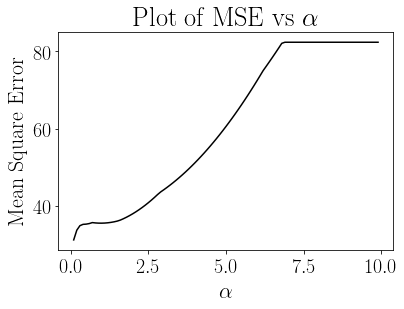

In [31]:
# Importing the model
from sklearn import linear_model
# Iterating through lambda to find optimal value
errors = []
alphas = np.arange(0.1,10,0.1).tolist()
for alpha in alphas:
    reg = linear_model.Lasso(alpha)
    reg.fit(X_train,Y_train)
    pred = reg.predict(X_val)
    error = mean_squared_error(Y_val, pred)
    errors.append(error)
# Plotting the error
plt.figure()
plt.plot(alphas, errors, 'k')
plt.xlabel(r'$\alpha$')
plt.ylabel(r'Mean Square Error')
plt.title(r"Plot of MSE vs $\alpha$")
# Finding the Optimal alpha
alpha_opt = alphas[errors.index(min(errors))]
print ("The optimal value of alpha is %.4f"%alpha_opt)
print ("The value of MSE corresponding to minimum alpha is %.4f"%min(errors))
# Finding Optimal Model
reg_opt = linear_model.Lasso(alpha_opt)
reg_opt.fit(X_train,Y_train)

#### Evaluating LASSO on Test Set

In [32]:
pred = reg_opt.predict(scaler.transform(x_test))
error = mean_squared_error(y_test, pred)
print ("MSE for LASSO = %.4f"%(error))

MSE for LASSO = 23.3346


#### Checking for non-zero components

In [43]:
print ("Coefficients: \n", reg_opt.coef_)
print ("Non-zero Coefficients: \n", reg_opt.coef_[np.nonzero(reg_opt.coef_)])
print ("Number of non-zero Coefficients: ", np.shape(np.nonzero(reg_opt.coef_))[1])

Coefficients: 
 [-0.86954276  0.94971562 -0.          0.30604905 -0.76188819  2.89187927
  0.         -2.50535868  1.5191422  -1.66381487 -1.73269078  0.85810411
 -3.94887155]
Non-zero Coefficients: 
 [-0.86954276  0.94971562  0.30604905 -0.76188819  2.89187927 -2.50535868
  1.5191422  -1.66381487 -1.73269078  0.85810411 -3.94887155]
Number of non-zero Coefficients:  11
